In [55]:
import requests
import pandas as pd
import os

nyc_limit = 100000
la_limit = 100000
chi_limit = 100000

NYC API Connection

In [56]:
import pandas as pd
from sodapy import Socrata


# Connect to NYC API
NYCAppToken = '3u5hcZ6WwKere5Mb5nm5S9mT2'
nyc_client = Socrata("data.cityofnewyork.us",
                 NYCAppToken,
                 username="Cameron.Suddreth@du.edu",
                 password="COMP4447groupproject")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
nyc_results = nyc_client.get("5uac-w243", limit=nyc_limit)

# Convert to pandas DataFrame
nyc_df = pd.DataFrame.from_records(nyc_results)


LA API Connection

In [57]:

# Example authenticated client (needed for non-public datasets):
LA_AppToken = 'mEU8HkgWCvfkWLHKGxfiUFecc'
la_client = Socrata("data.lacity.org",
                 LA_AppToken,
                 username="Cameron.Suddreth@du.edu",
                 password="COMP4447groupproject")


la_results = la_client.get("2nrs-mtv8", limit=la_limit)

# Convert to pandas DataFrame
la_df = pd.DataFrame.from_records(la_results)

Chicago API Connection

In [58]:
CHI_AppToken = '6rxQVr5BfXAbUUccKTodxYVdj'
chi_client = Socrata("data.cityofchicago.org",
                    CHI_AppToken,
                    username="Cameron.Suddreth@du.edu",
                    password="COMP4447groupproject")
chi_results = chi_client.get("9hwr-2zxp", limit=chi_limit)
chi_df = pd.DataFrame.from_records(chi_results)


In [42]:
# # results_df.head(10).to_csv('head_output.csv', index = False)
# print(len(nyc_df))
# print(len(la_df))
# print(len(chi_df))
# la_columns = la_df.columns.tolist()
# nyc_columns = nyc_df.columns.tolist()
# chi_columns = chi_df.columns.tolist()
# print(f'LA: {la_columns}')
# print(f'NYC: {nyc_columns}')
# print(f'CHI: {chi_columns}')


In [59]:
import numpy as np

# Number of Records limit



nyc_df['Weapon'] = np.nan
chi_df['Weapon'] = np.nan
chi_df['Time'] = np.nan
chi_df['Victim Sex'] = np.nan
nyc_df['City'] = 'NYC'
la_df['City'] = "LA"
chi_df['City'] = 'CHI'

nyc_df.head(10)
#chi_df.head(10)
#la_df.head(10)

,cmplnt_num,addr_pct_cd,boro_nm,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_tm,crm_atpt_cptd_cd,hadevelopt,jurisdiction_code,juris_desc,...,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,housing_psa,cmplnt_to_dt,transit_district,Weapon,City
0,269235387,42,BRONX,2023-06-03T00:00:00.000,01:00:00,(null),COMPLETED,(null),0,N.Y. POLICE DEPT,...,10937,34,5,43,25,NaN,NaN,NaN,NaN,NYC
1,262102261,43,BRONX,2023-01-18T00:00:00.000,14:00:00,(null),COMPLETED,(null),0,N.Y. POLICE DEPT,...,11269,58,5,31,26,NaN,NaN,NaN,NaN,NYC
2,267972239,43,BRONX,2023-05-07T00:00:00.000,00:15:00,(null),COMPLETED,(null),0,N.Y. POLICE DEPT,...,11610,58,5,31,26,NaN,NaN,NaN,NaN,NYC
3,263141402H1,NaN,BROOKLYN,2023-02-06T00:00:00.000,10:16:00,(null),COMPLETED,(null),0,N.Y. POLICE DEPT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYC
4,269307857H1,NaN,BROOKLYN,2023-06-04T00:00:00.000,00:20:00,(null),COMPLETED,(null),0,N.Y. POLICE DEPT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYC
5,277525074H3,NaN,QUEENS,2023-11-14T00:00:00.000,07:05:00,(null),COMPLETED,(null),0,N.Y. POLICE DEPT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYC
6,277525074H1,NaN,QUEENS,2023-11-14T00:00:00.000,07:05:00,(null),COMPLETED,(null),0,N.Y. POLICE DEPT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYC
7,271421229H1,NaN,BROOKLYN,2020-07-05T00:00:00.000,21:45:00,(null),COMPLETED,NOSTRAND,2,N.Y. HOUSING POLICE,...,NaN,NaN,NaN,NaN,NaN,1696,NaN,NaN,NaN,NYC
8,270206142H1,NaN,MANHATTAN,2023-06-21T00:00:00.000,16:25:00,(null),COMPLETED,(null),0,N.Y. POLICE DEPT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYC
9,278972931,123,STATEN ISLAND,2023-12-14T00:00:00.000,02:50:00,02:52:00,COMPLETED,(null),0,N.Y. POLICE DEPT,...,10699,15,1,9,77,NaN,2023-12-14T00:00:00.000,NaN,NaN,NYC


In [60]:

la_df = la_df[['dr_no', 'date_rptd', 'date_occ', 'crm_cd', 'crm_cd_desc', 'weapon_desc', 'vict_sex', 'lat', 'lon', 'City']]
nyc_df = nyc_df[['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm','ky_cd', 'ofns_desc', 'Weapon', 'vic_sex', 'latitude','longitude', 'City']]
chi_df = chi_df[['id', 'date','Time', 'iucr','description','Weapon', 'Victim Sex','latitude','longitude', 'City']]
generic_columns = ['Case Number', 'Date', 'Time', 'Crime Code', 'Crime Description','Weapon', 'Victim Sex', 'Latitude', 'Longitude', 'City']

# la_df.head(15)
# nyc_df.head(15)
# chi_df.head(15)
print(generic_columns)

['Case Number', 'Date', 'Time', 'Crime Code', 'Crime Description', 'Weapon', 'Victim Sex', 'Latitude', 'Longitude', 'City']


In [61]:
# Rename the columns
la_df.columns = generic_columns
nyc_df.columns = generic_columns
chi_df.columns = generic_columns


In [62]:
combined_df = pd.concat([la_df, nyc_df, chi_df],ignore_index=True)
combined_df.sample(25)
combined_df


,Case Number,Date,Time,Crime Code,Crime Description,Weapon,Victim Sex,Latitude,Longitude,City
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,510,VEHICLE - STOLEN,NaN,M,34.0375,-118.3506,LA
1,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,330,BURGLARY FROM VEHICLE,NaN,M,34.0444,-118.2628,LA
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,480,BIKE - STOLEN,NaN,X,34.021,-118.3002,LA
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),NaN,M,34.1576,-118.4387,LA
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,354,THEFT OF IDENTITY,NaN,M,34.0944,-118.3277,LA
...,...,...,...,...,...,...,...,...,...,...
299995,12793468,2022-08-12T19:00:00.000,NaN,0920,ATTEMPT - AUTOMOBILE,NaN,NaN,41.818495784,-87.613090912,CHI
299996,12792196,2022-08-12T19:00:00.000,NaN,0313,ARMED - OTHER DANGEROUS WEAPON,NaN,NaN,41.992026512,-87.710049481,CHI
299997,12792082,2022-08-12T19:00:00.000,NaN,1150,CREDIT CARD FRAUD,NaN,NaN,41.931526059,-87.747260641,CHI
299998,12792735,2022-08-12T19:00:00.000,NaN,0930,THEFT / RECOVERY - AUTOMOBILE,NaN,NaN,41.715879192,-87.600634432,CHI


  Case Number                     Date                     Time Crime Code  \
0   190326475  2020-03-01T00:00:00.000  2020-03-01T00:00:00.000        510   
1   200106753  2020-02-09T00:00:00.000  2020-02-08T00:00:00.000        330   
2   200320258  2020-11-11T00:00:00.000  2020-11-04T00:00:00.000        480   
3   200907217  2023-05-10T00:00:00.000  2020-03-10T00:00:00.000        343   
4   220614831  2022-08-18T00:00:00.000  2020-08-17T00:00:00.000        354   

                          Crime Description Weapon Victim Sex Latitude  \
0                          VEHICLE - STOLEN    NaN          M  34.0375   
1                     BURGLARY FROM VEHICLE    NaN          M  34.0444   
2                             BIKE - STOLEN    NaN          X   34.021   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)    NaN          M  34.1576   
4                         THEFT OF IDENTITY    NaN          M  34.0944   

   Longitude City Categorized Victim Sex  
0  -118.3506   LA                      M  


/var/folders/lv/2_h9np9d6y715flm7b4fcd_h0000gn/T/ipykernel_49971/2110134860.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_chicago['Categorized Victim Sex'] = data_without_chicago['Victim Sex'].apply(categorize_sex)


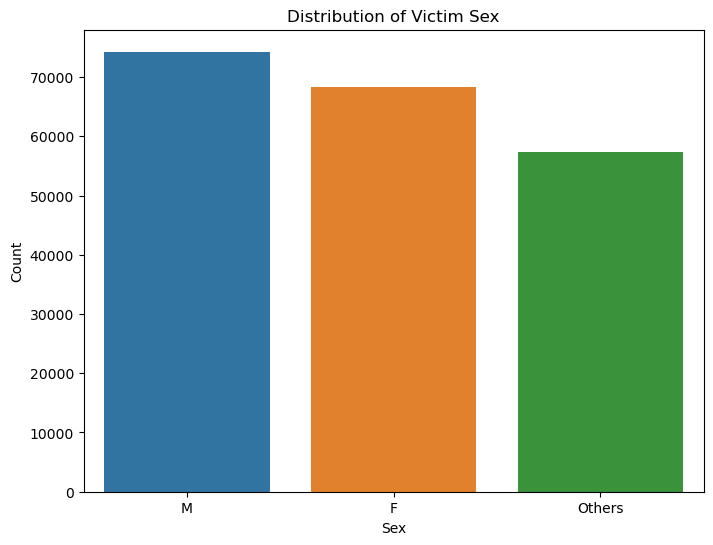

In [66]:
#ALL 3 CITIES


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = combined_df

# Filter out data for all cities except Chicago
data_without_chicago = data[data['City'] != 'CHI']

# Function to categorize victim sex
def categorize_sex(sex):
    if sex == 'F':
        return 'F'
    elif sex == 'M':
        return 'M'
    else:
        return 'Others'

# Create a new column for categorized victim sex
data_without_chicago['Categorized Victim Sex'] = data_without_chicago['Victim Sex'].apply(categorize_sex)

# Check the first few rows of the dataframe
print(data_without_chicago.head())

# Exploratory Data Analysis
# Count the occurrences of each victim sex
victim_sex_counts = data_without_chicago['Categorized Victim Sex'].value_counts()

# Plot the distribution of victim sexes
plt.figure(figsize=(8, 6))
sns.barplot(x=victim_sex_counts.index, y=victim_sex_counts.values)
plt.title('Distribution of Victim Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


<Figure size 1200x800 with 0 Axes>

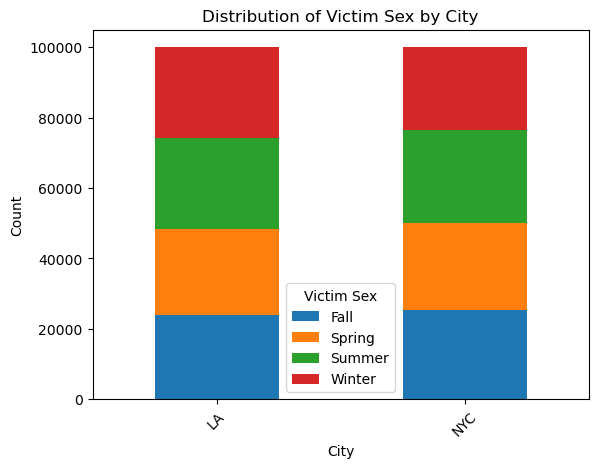

In [65]:
#FOR ONLY NYC AND CHI

# Filter out data for all cities except Chicago
grouped_data_without_chicago = grouped_data.drop('CHI', axis=0)

# Plot the distribution of victim sexes for each city excluding Chicago
plt.figure(figsize=(12, 8))
grouped_data_without_chicago.plot(kind='bar', stacked=True)
plt.title('Distribution of Victim Sex by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Victim Sex')
plt.show()


In [67]:
# Calculate descriptive statistics
total_victims = victim_sex_counts.sum()
male_percentage = (victim_sex_counts['M'] / total_victims) * 100
female_percentage = (victim_sex_counts['F'] / total_victims) * 100
others_percentage = (victim_sex_counts['Others'] / total_victims) * 100

print("Total number of victims:", total_victims)
print("Percentage of male victims:", male_percentage)
print("Percentage of female victims:", female_percentage)
print("Percentage of others victims:", others_percentage)



Total number of victims: 200000
Percentage of male victims: 37.1425
Percentage of female victims: 34.1595
Percentage of others victims: 28.698


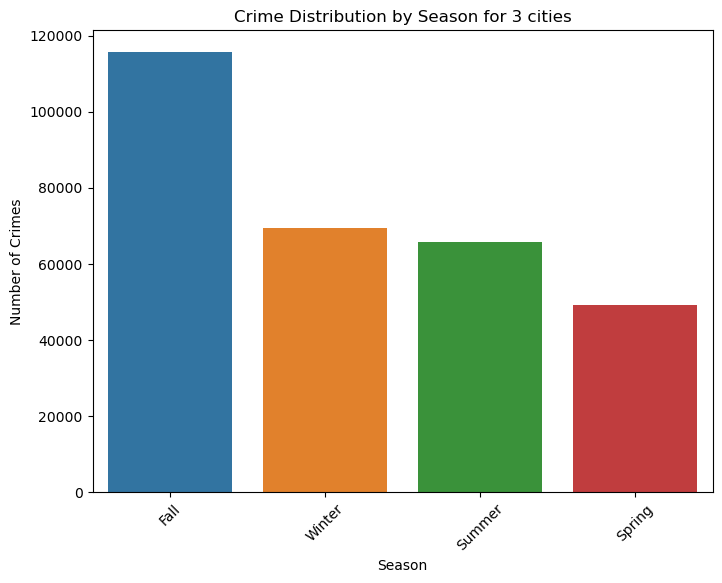

In [80]:
# ALL 3 CITIES TOGETHER BY SEASON


# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract month from the date
data['Month'] = data['Date'].dt.month

# Function to map month to season
def map_season(month):
    if month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    elif month in [9, 10, 11]: return 'Fall'
    else: return 'Winter'

# Map month to season
data['Season'] = data['Month'].apply(map_season)

# Count occurrences of crimes by season
crime_by_season = data['Season'].value_counts()

# Plot crime distribution by season
plt.figure(figsize=(8, 6))
sns.barplot(x=crime_by_season.index, y=crime_by_season.values)
plt.title('Crime Distribution by Season for 3 cities')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


<Figure size 800x600 with 0 Axes>

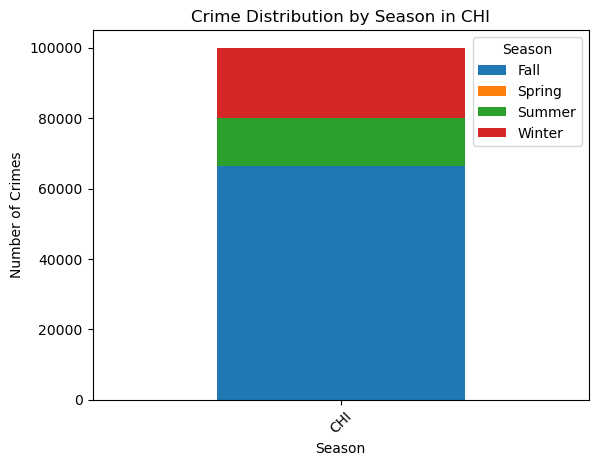

<Figure size 800x600 with 0 Axes>

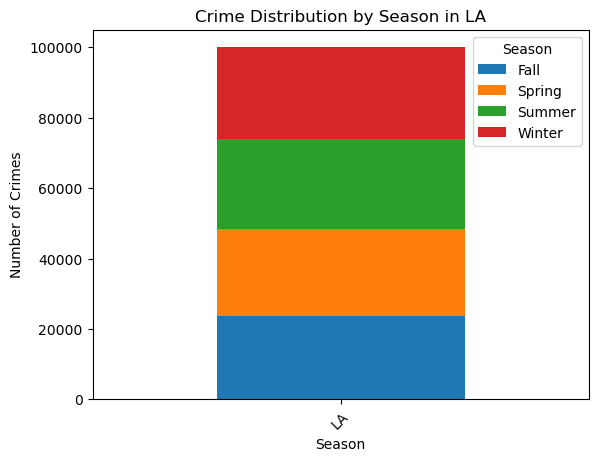

<Figure size 800x600 with 0 Axes>

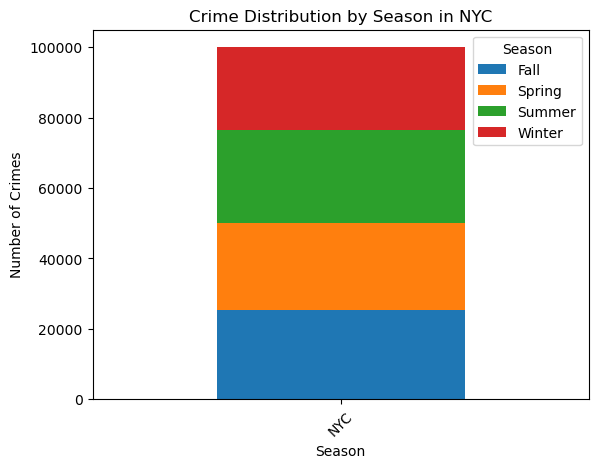

In [52]:
# BY SEASON OF EACH CITY

# Group by city and season
grouped_data = data.groupby(['City', 'Season']).size().unstack().fillna(0)

# Plot crime distribution by season for each city
for city in grouped_data.index:
    city_data = grouped_data.loc[[city]]
    plt.figure(figsize=(8, 6))
    city_data.plot(kind='bar', stacked=True)
    plt.title(f'Crime Distribution by Season in {city}')
    plt.xlabel('Season')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45)
    plt.legend(title='Season')
    plt.show()

/var/folders/lv/2_h9np9d6y715flm7b4fcd_h0000gn/T/ipykernel_49971/4105270691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_chicago_la['Hour'] = pd.to_datetime(data_without_chicago_la['Time']).dt.hour


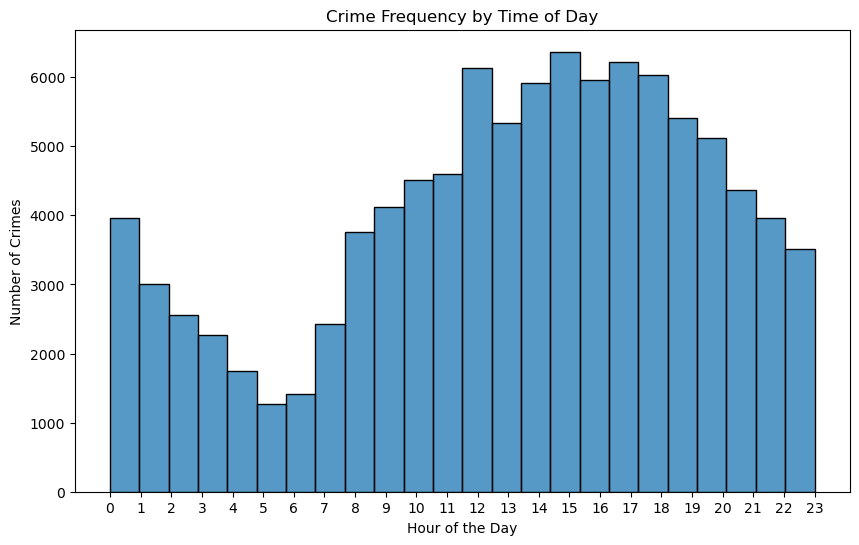

In [71]:
#BY HOUR ONLY FOR NYC

# Filtering out data for cities other than Chicago and Los Angeles
data_without_chicago_la = data[~data['City'].isin(['CHI', 'LA'])]

# Creating a new column 'Hour' to store the hour of the crime
data_without_chicago_la['Hour'] = pd.to_datetime(data_without_chicago_la['Time']).dt.hour


# Plotting the distribution of crime types by time of day for each city (excluding Chicago and Los Angeles)
for city in data_without_chicago_la['City'].unique():
    city_data = data_without_chicago_la[data_without_chicago_la['City'] == city]
    plt.figure(figsize=(10, 6))
    sns.histplot(city_data['Hour'], bins=24, kde=False)
    plt.title(f'Crime Frequency by Time of Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Crimes')
    plt.xticks(range(0, 24))
    plt.show()


In [73]:
# Extract day of the week from the date
data['DayOfWeek'] = pd.to_datetime(data['Date']).dt.dayofweek

# Define the mapping of day of the week to its name
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}



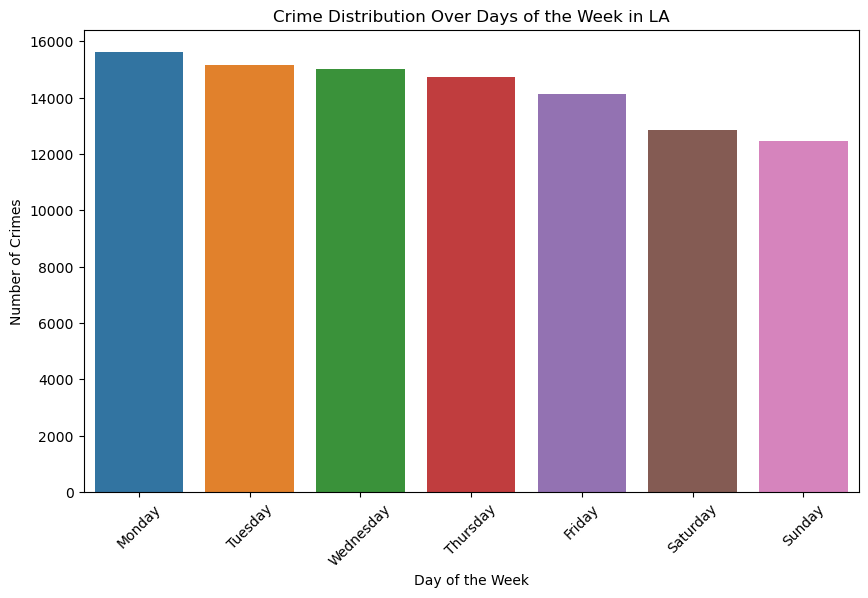

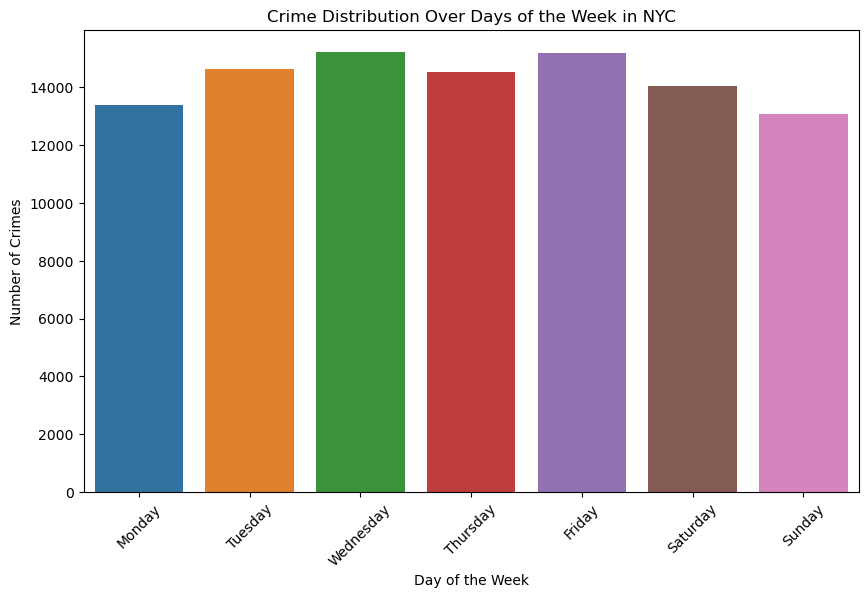

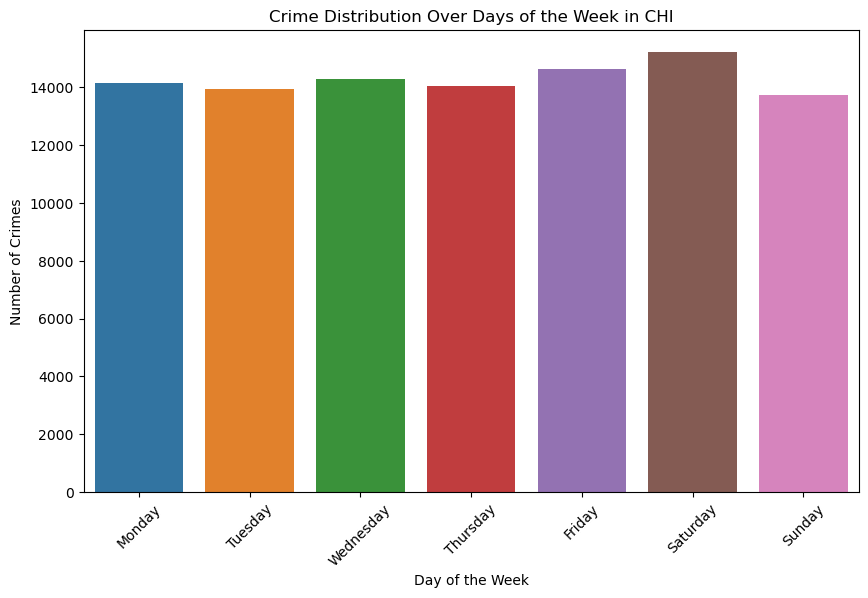

In [75]:
# Plot the distribution of crimes over days of the week for each city
for city in data['City'].unique():
    city_data = data[data['City'] == city]
    crime_by_day = city_data.groupby('DayOfWeek').size()
    crime_by_day = crime_by_day.rename(index=days_of_week)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=crime_by_day.index, y=crime_by_day.values, linewidth=1)  # Set linewidth to reduce bar size
    plt.title(f'Crime Distribution Over Days of the Week in {city}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45)
    plt.show()


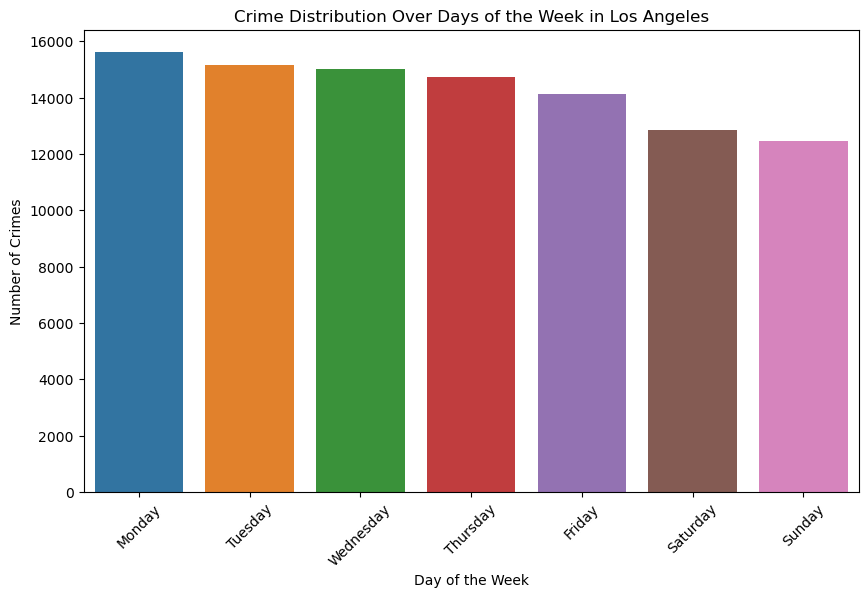

In [77]:
#BY WEEK FOR LA

# Filter data for Los Angeles
la_data = data[data['City'] == 'LA']

# Calculate crime distribution over days of the week
crime_by_day_la = la_data.groupby('DayOfWeek').size()
crime_by_day_la = crime_by_day_la.rename(index=days_of_week)

# Plot crime distribution over days of the week for Los Angeles
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_by_day_la.index, y=crime_by_day_la.values, linewidth=1)
plt.title('Crime Distribution Over Days of the Week in Los Angeles')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


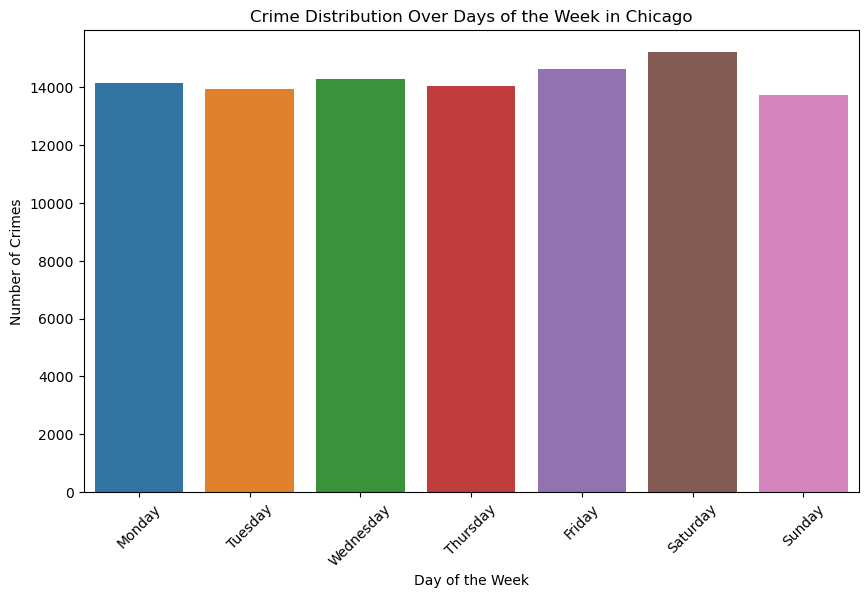

In [78]:
#BY WEEK FOR CHICAGO

# Filter data for Chicago
chi_data = data[data['City'] == 'CHI']

# Calculate crime distribution over days of the week
crime_by_day_chi = chi_data.groupby('DayOfWeek').size()
crime_by_day_chi = crime_by_day_chi.rename(index=days_of_week)

# Plot crime distribution over days of the week for Chicago
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_by_day_chi.index, y=crime_by_day_chi.values, linewidth=1)
plt.title('Crime Distribution Over Days of the Week in Chicago')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


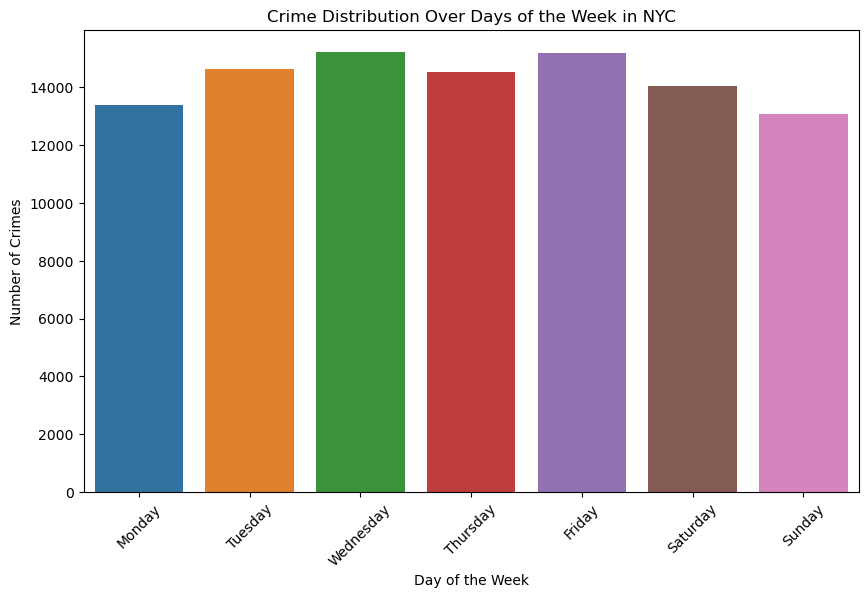

In [79]:
#BY WEEK FOR NYC

# Filter data for NYC
nyc_data = data[data['City'] == 'NYC']

# Calculate crime distribution over days of the week
crime_by_day_nyc = nyc_data.groupby('DayOfWeek').size()
crime_by_day_nyc = crime_by_day_nyc.rename(index=days_of_week)

# Plot crime distribution over days of the week for NYC
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_by_day_nyc.index, y=crime_by_day_nyc.values, linewidth=1)
plt.title('Crime Distribution Over Days of the Week in NYC')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()
